In [1]:
from indcomp import MAIC
from indcomp.datasets import load_NICE_DSU18

df_AB_IPD, df_AC_AgD = load_NICE_DSU18()
print(df_AB_IPD.sample(5))
print(df_AC_AgD.round(2))

      ID  age  gender trt  y
77    78   48    Male   A  1
260   11   49    Male   B  0
488  239   51  Female   B  0
155  156   55    Male   A  1
349  100   47  Female   B  0
   age.mean  age.sd  N.male  prop.male  y.A.sum  y.A.bar  N.A  y.C.sum  \
0     50.27    3.12      68       0.23      125     0.83  150       21   

   y.C.bar  N.C  
0     0.14  150  


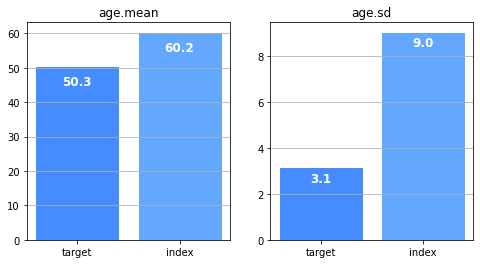

In [2]:
maic = MAIC(
    df_index=df_AB_IPD,
    df_target=df_AC_AgD,
    match={
        "age.mean": ("mean", "age"),
        "age.sd": ("std", "age", "age.mean"),
    },
)
fig = maic.compare_populations()
fig.savefig("../figures/NICE_DSU18_populations_unweighted.png")
fig

Effective Sample Size: 178.56


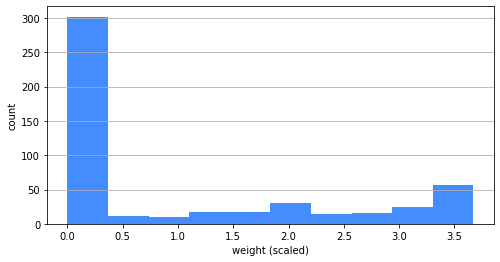

In [3]:
maic.calc_weights()
print(f"Effective Sample Size: {maic.ESS_:.2f}")
fig = maic.plot_weights()
fig.savefig("../figures/NICE_DSU18_weights.png")
fig

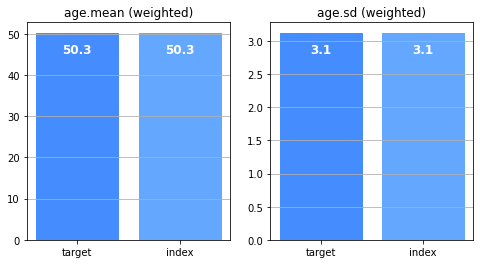

In [4]:
fig = maic.compare_populations(weighted=True)
fig.savefig("../figures/NICE_DSU18_populations_weighted.png")
fig